# Projeto E-Commerce

**Definindo o problema de negócio**

* Você começou a trabalha em uma **empresa de comércio eletrônico** como um cientista de dados na cidade de Nova York. A empresa **vende roupas onlines** e também **fornece serviços** de consultoria em estilo e vestuário. Clientes procuram na loja sessões/reuniões com um estilista pessoal e podem decidir encomendar roupas que eles desejam usando um **aplicativo móvel ou um site**. A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em **aplicativos móveis ou em seu site**. Não existe recurso para os investimentos, você foi contratado para ajudá-los a descobrir isso! Vamos começar!

**Informações sobre o conjunto de dados**
* Obtidos de: https://www.kaggle.com/srolka/ecommerce-customers
- Informações pessoais dos clientes:
    - **Endereço**
    - **Email**
    - **Avatar**
- Informações sobre a interação dos clientes com a loja 
    - **Avg. Session Length**: Tempo médio das sessões de consultoria de estilo na loja.
    - **Time on App**: Tempo médio gasto no app em minutos.
    - **Time on Website**: Tempo médio gasto no site em minutos.
    - **Lenght of Membership**: Há quantos anos o cliente é membro.
    - **Yearly Amount Spent**: Valor gasto anualmente

In [1]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Configurações para os gráficos

%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Carregando base de dados

dados = pd.read_csv('Dados/Ecommerce Customers.csv')

In [4]:
# Visualizando os dados

dados.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# Descrição do conjunto de dados

dados.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# Informações sobre o conjunto de dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
# Verificando a existência de valores faltantes

dados.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### Análise Exploratória dos Dados

**1ª) Os clientes que passam mais tempo no site gastam mais?**

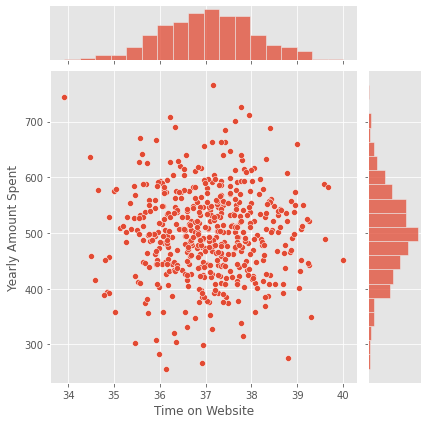

In [8]:
# Gráfico 1: relação entre o tempo no site e o valor gasto anualmente

sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = dados);

**2º) Os clientes que passam mais tempo no APP gastam mais?**

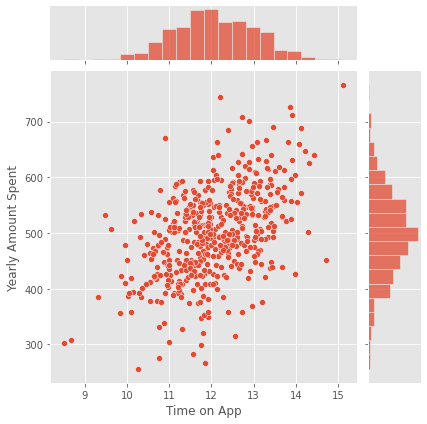

In [9]:
# Gráfico 2: relação entre o tempo no APP e valor gasto anualmente

sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data =  dados);

**3º) As pessoas que usam o aplicativo são clientes a mais tempo?**

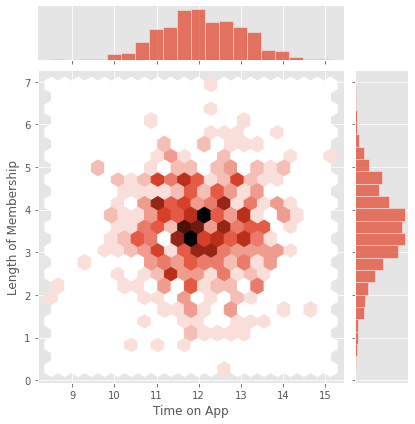

In [10]:
# Gráfico 3: relação entre o uso do aplicativo e o tempo como cliente da loja

sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = dados, kind = 'hex');

**4º) As pessoas que são cliente a mais tempo gastam mais?**

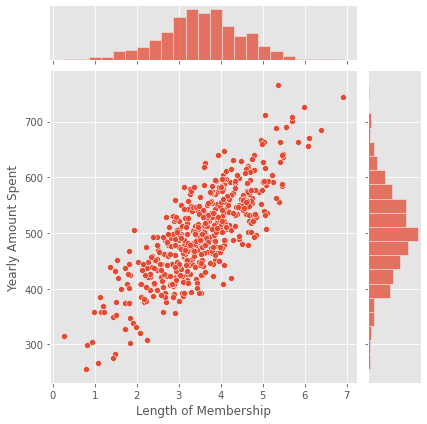

In [11]:
# Gráfico 4: relação entre o tempo como cliente e o valor gasto anualmente

sns.jointplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = dados);

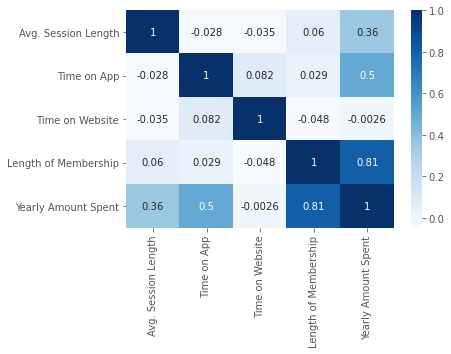

In [12]:
# Visualizando a correlação entre as variáveis

sns.heatmap(dados.corr(), annot=True, cmap='Blues');

**Insights**
* Os clientes que passam mais tempo no site **não** gastam mais;
* Os clientes que passam mais tempo no App **gastam** mais;
* As pessoas que utilizam o aplicativo a mais tempo **não** são, necessariamente, clientes a mais tempo;
* As pessoas que são clientes a mais tempo gastam mais.

### Criando Modelo de Regressão Linear

In [13]:
# Separando os dados

x_dados = dados[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y_dados = dados['Yearly Amount Spent']

In [14]:
# Separando os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(x_dados, y_dados, test_size = 0.3, random_state = 0)

In [15]:
# Verificando a forma dos dados

print(X_treino.shape)
print(X_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(350, 4)
(150, 4)
(350,)
(150,)


**Criando e treinando o modelo**

In [16]:
# Instânciando o modelo

modelo = LinearRegression()

In [17]:
# Treinando o modelo

modelo.fit(X_treino, y_treino)

LinearRegression()

In [18]:
# Aplicando o modelo nos dados de teste

resultado = modelo.predict(X_teste)

Text(0, 0.5, 'Predito')

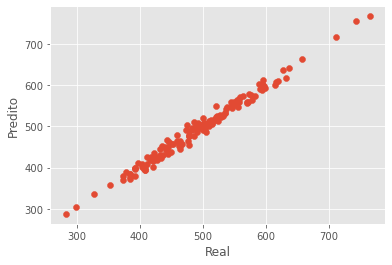

In [19]:
# Gerando o um gráfico com os dados reais e preditos

plt.scatter(y_teste, resultado)
plt.xlabel('Real')
plt.ylabel('Predito')

### Avaliando o Modelo

In [20]:
# Calculando as métricas

MAE = metrics.mean_absolute_error(y_teste, resultado)
MSE = metrics.mean_squared_error(y_teste, resultado)
RMSE = np.sqrt(metrics.mean_squared_error(y_teste, resultado))
R = metrics.r2_score(y_teste, resultado)

In [21]:
# Criando uma função para calcular o R ajustado

def R_ajustado(y_dados, resultado, N):
    r_ajus = (1 - ((1 - metrics.r2_score(y_dados, resultado)) * (len(y_dados) - 1)) / (len(y_dados) - N - 1))
    return r_ajus

In [22]:
# Métricas

print('Mean Absolute Error: {}'.format(MAE))
print('Mean Squared Error: {}'.format(MSE))
print('Root Mean Squared Error: {}'.format(RMSE))
print('R²: {}'.format(R))
print('R-adjust: {}'.format(R_ajustado(y_teste, resultado, X_treino.shape[1])))

Mean Absolute Error: 7.851377170861458
Mean Squared Error: 94.55779479273306
Root Mean Squared Error: 9.724083236620976
R²: 0.9849262667370622
R-adjust: 0.9845104396125673


### Resultados

* **É melhor eu investir no site ou no aplicativo?**

In [23]:
coef = pd.DataFrame(modelo.coef_, x_dados.columns, columns = ['Coefs'])
coef

,Coefs
Avg. Session Length,25.767530
Time on App,38.800394
Time on Website,-0.018041
Length of Membership,61.852568


**Insights**
* O tempo no site reflete muito pouco na receita anual, tanto que a cada minuto gasto em média no **aplicativo**, tem-se um aumento na receita anual em 38.80 dólares;
* A empresa ganha mais quando fideliza seu cliente, quanto mais tempo em unidade de fidelização maior a receita anual em 61.85 dólares.

**Parecer Final:** Com base nos insights obtidos ao decorrer do estudo, a empresa deve invetir no APP.